## Objective of project:
#### Predict the likelihood of a liability customer buying personal loans.

## Attribute Information:
>1. ID : Customer ID
2. Age : Customer's age in completed years.
3. Experience : #years of professional experience.
4. Income : Annual income of the customer.
5. ZIP Code : Home Address ZIP code.
6. Family : Family size of the customer.
7. CCAvg : Avg. spending on credit cards per month
8. Education : Education Level.
9. Mortgage : Value of house mortgage.
10. Personal Loan : Customer who accepted the personal loan offered in the last campaign.
11. Securities Account : Customer having a securities account with the bank.
12. CD Account : Customer having a certificate of deposit (CD) account with the bank.
13. Online : Customer using internet banking facilities.
14. Credit card : Customer using a credit card issued by Thera Bank.

# 1. Analyzing, understanding and describing each attribute 

## Importing required libraries.


In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
import warnings 
warnings.filterwarnings('ignore')


In [2]:
# reading csv file 
bp = pd.read_csv("Bank.csv") 

In [3]:
bp

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

### Categorical Feature:


- Family
- Education
- ID
- Zip Code
- Securities Account
- CD Account
- Online
- Credit Card

### Numerical feature:
    
- Age
- Experience
- Income
- CCAvg
- Mortage

In [4]:
bp.profile_report()

##### Shape of the data

In [5]:
bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**The data contain 5000 rows and 14 column with no null values
and showing data-type of each column**

#### 5 point summary defiened  given as follows:
>1. The minimum.
2. Q1 (the first quartile, or the 25% mark).
3. The median (50%).
4. Q3 (the third quartile, or the 75% mark).
5. The maximum.

In [6]:
bp.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

**Checking If Negative Values present**

In [7]:
bpt=bp

for x in bpt:
    bp[x]=bp[x].astype(float)
    att = bp[x]
    #main
    a = att.lt(0).sum()
    outlier = [] 
    outliervalue = []
    if a != 0:
        print(x,'has Negative Value of',a)
    

Experience has Negative Value of 52


Negative Valued distribution of Experience column


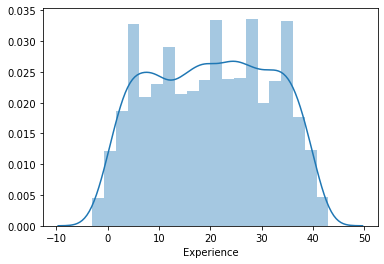

In [8]:
#Checking Negative Values of Experience through graph
print('Negative Valued distribution of Experience column')
sns.distplot(bp['Experience'], kde=True)

**Analyzing Negative Value**

In [9]:
bpt=bp['Experience']
nv = [] 
for x in bpt:  
    if x < 0: 
        nv.append(x)
print('Experience has Negative Value with total count',len(nv))

def unique(list1): 
    # intilize a null list 
    unique_list = [] 
    # traverse for all elements 
    for x in nv: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    # print list 
    for x in unique_list:
        print ('\nUnique Negative value :',x)
      
unique(nv)
print('\nReplaced Negative values of Experience with 0')
for i in range(len(bpt)):
    if bpt[i] < 0:
        bpt[i] = 0

Experience has Negative Value with total count 52

Unique Negative value : -1.0

Unique Negative value : -2.0

Unique Negative value : -3.0

Replaced Negative values of Experience with 0


In [10]:
exp_mean = bp['Experience'].median()
#print('\nMean of Experience',exp_mean)
print('Replacing all 0 values of Experience with Mean of the column.\nMean of the column is:',exp_mean)

bpt=bp['Experience']
for i in range(len(bpt)):
    if bpt[i] == 0:
        bpt[i] = exp_mean

Replacing all 0 values of Experience with Mean of the column.
Mean of the column is: 20.0


Adjusted distribution of Experience column


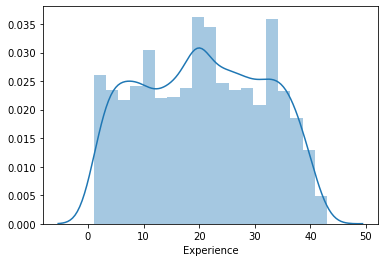

In [11]:
#Checking adjusted of valuesof Experience through graph
print('Adjusted distribution of Experience column')
sns.distplot(bp['Experience'], kde=True)

In [12]:
bp.nunique()

ID                    5000
Age                     45
Experience              43
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

## Checking the presence of outliers in columns


In [13]:
for x in bp:
    bp[x]=bp[x].astype(float)
    att = bp[x]
    mean = np.mean(att) 
    std = np.std(att) 
    #print('\nmean of',x,' the dataset is', mean) 
   # print('\nstd. deviation of',x,' is', std) 
    outlier = [] 
    outliervalue = []
    for i in att: 
        z = (i-mean)/std 
        if z < -3.00 or z > 3.00: 
            outlier.append(i) 
            outliervalue.append(z)
    print('No. of outlier of',x,'in dataset is',len(outlier))
    

No. of outlier of ID in dataset is 0
No. of outlier of Age in dataset is 0
No. of outlier of Experience in dataset is 0
No. of outlier of Income in dataset is 2
No. of outlier of ZIP Code in dataset is 1
No. of outlier of Family in dataset is 0
No. of outlier of CCAvg in dataset is 121
No. of outlier of Education in dataset is 0
No. of outlier of Mortgage in dataset is 105
No. of outlier of Personal Loan in dataset is 480
No. of outlier of Securities Account in dataset is 0
No. of outlier of CD Account in dataset is 302
No. of outlier of Online in dataset is 0
No. of outlier of CreditCard in dataset is 0


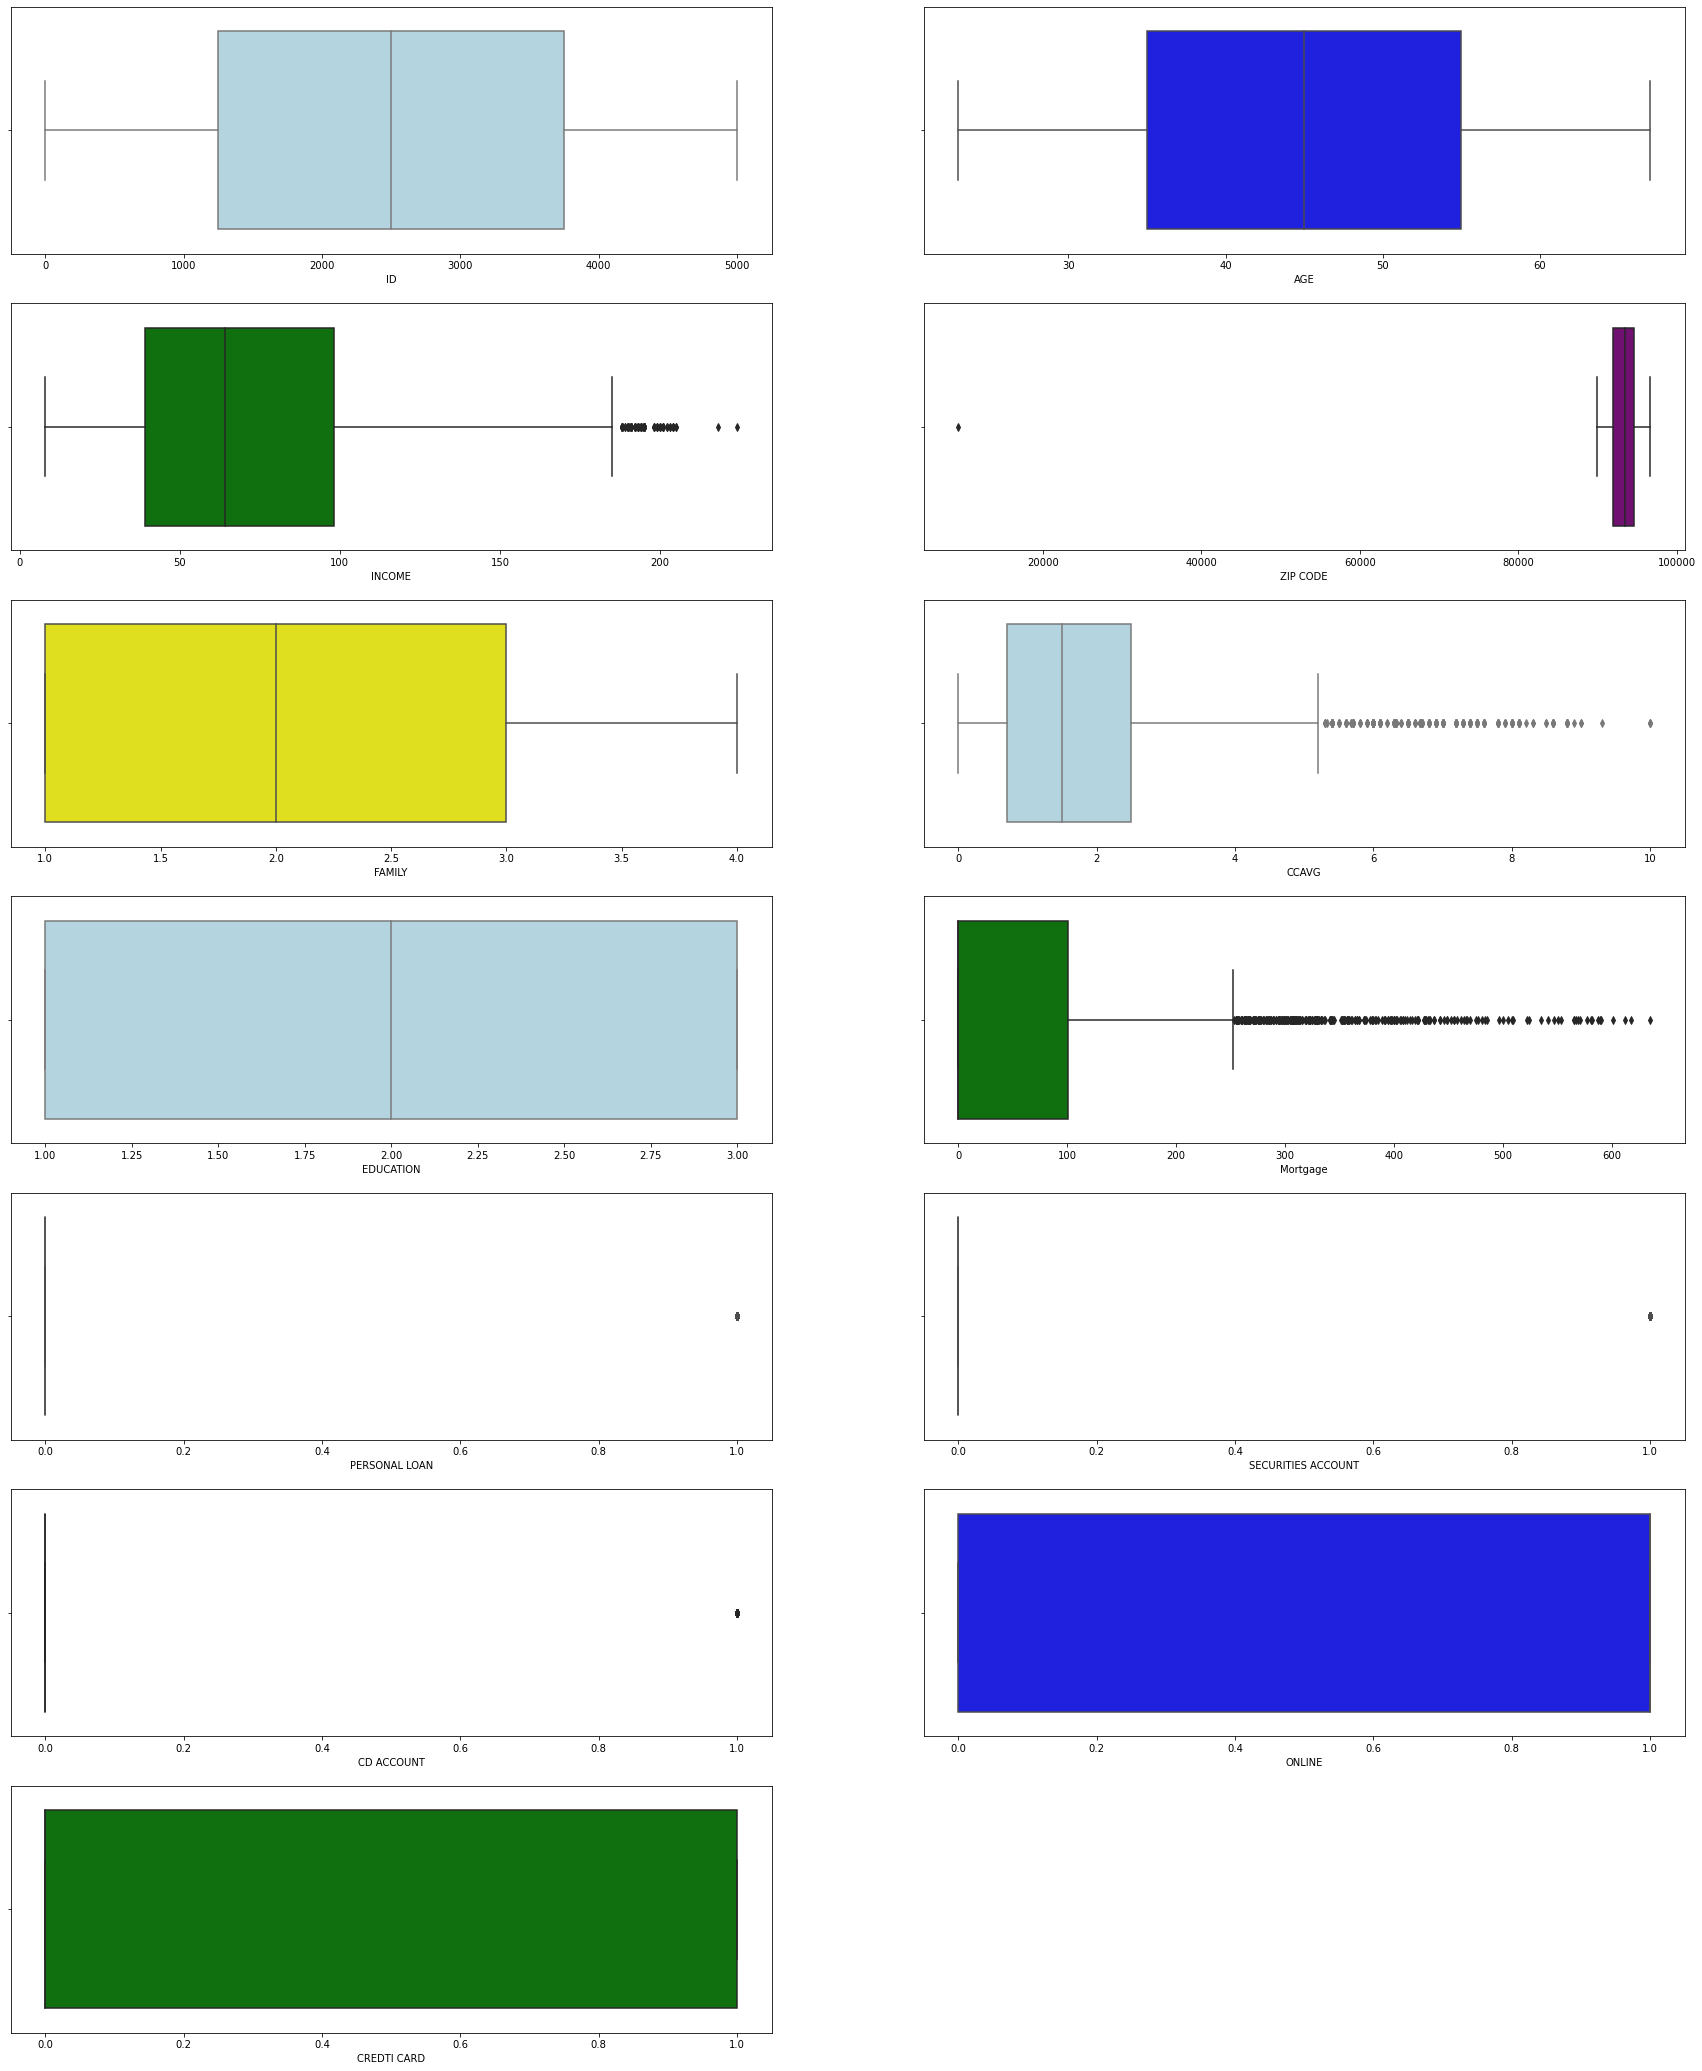

In [14]:
plt.figure(figsize= (30,70))

plt.subplot(13,2,1)
sns.boxplot(x= bp.ID, color='lightblue')
plt.xlabel('ID')

plt.subplot(13,2,2)
sns.boxplot(x= bp.Age, color='blue')
plt.xlabel('AGE')

plt.subplot(13,2,3)
sns.boxplot(x= bp.Income, color='green')
plt.xlabel('INCOME')

plt.subplot(13,2,4)
sns.boxplot(x= bp['ZIP Code'], color='purple')
plt.xlabel('ZIP CODE')

plt.subplot(13,2,5)
sns.boxplot(x= bp.Family, color='yellow')
plt.xlabel('FAMILY')

plt.subplot(13,2,6)
sns.boxplot(x= bp.CCAvg, color='lightblue')
plt.xlabel('CCAVG')

plt.subplot(13,2,7)
sns.boxplot(x= bp.Education, color='lightblue')
plt.xlabel('EDUCATION')

plt.subplot(13,2,8)
sns.boxplot(x= bp.Mortgage, color='green')
plt.xlabel('Mortgage')

plt.subplot(13,2,9)
sns.boxplot(x= bp['Personal Loan'], color='blue')
plt.xlabel('PERSONAL LOAN')

plt.subplot(13,2,10)
sns.boxplot(x= bp['Securities Account'], color='yellow')
plt.xlabel('SECURITIES ACCOUNT')

plt.subplot(13,2,11)
sns.boxplot(x= bp['CD Account'], color='purple')
plt.xlabel('CD ACCOUNT')

plt.subplot(13,2,12)
sns.boxplot(x= bp.Online, color='blue')
plt.xlabel('ONLINE')

plt.subplot(13,2,13)
sns.boxplot(x= bp['CreditCard'], color='green')
plt.xlabel('CREDTI CARD')

plt.show()

##### Checking Skewness of columns

In [15]:
for x in bp:
    series          = bp[x]
    skewness        = series.skew()
    if skewness > -.25  and skewness < .25 :
        print(x,"is Symmetrically Skewed as Skewness =",round(skewness,3),'\n')
    elif skewness > .25:
            print(x,"is Positively Skewed towards Right side of asymmetric distribution as Skewness =",round(skewness,3),'\n')
    elif skewness < -.25:
            print(x,"is Negatively Skewed towards Left side of asymmetric distribution as Skewness =",round(skewness,3),'\n')

ID is Symmetrically Skewed as Skewness = 0.0 

Age is Symmetrically Skewed as Skewness = -0.029 

Experience is Symmetrically Skewed as Skewness = -0.004 

Income is Positively Skewed towards Right side of asymmetric distribution as Skewness = 0.841 

ZIP Code is Negatively Skewed towards Left side of asymmetric distribution as Skewness = -12.5 

Family is Symmetrically Skewed as Skewness = 0.155 

CCAvg is Positively Skewed towards Right side of asymmetric distribution as Skewness = 1.598 

Education is Symmetrically Skewed as Skewness = 0.227 

Mortgage is Positively Skewed towards Right side of asymmetric distribution as Skewness = 2.104 

Personal Loan is Positively Skewed towards Right side of asymmetric distribution as Skewness = 2.744 

Securities Account is Positively Skewed towards Right side of asymmetric distribution as Skewness = 2.588 

CD Account is Positively Skewed towards Right side of asymmetric distribution as Skewness = 3.692 

Online is Negatively Skewed towards Le

>1. A skewness value near 0 in the output denotes of symmetrical distribution.
>2. A negative skewness value in the output indicates an asymmetrical distribution having the tail is larger towards the left hand side of the distribution.
>3. A positive skewness value in the output indicates an asymmetrical distribution having the tail is larger towards the right hand side of the distribution.

### As the model has to predict about getting the Personal Loan, it is important to know that which factors genuinely affect the likelihood of getting a person Personal Loan

**The factors which geniunely affect the _Personal Loan_ is to be studied from below tables**

In [16]:
a = bp.corr()
a

ID       Age  Experience    Income  ZIP Code  \
ID                  1.000000 -0.008473   -0.003271 -0.017695  0.013432   
Age                -0.008473  1.000000    0.957979 -0.055269 -0.029216   
Experience         -0.003271  0.957979    1.000000 -0.052301 -0.028019   
Income             -0.017695 -0.055269   -0.052301  1.000000 -0.016410   
ZIP Code            0.013432 -0.029216   -0.028019 -0.016410  1.000000   
Family             -0.016797 -0.046418   -0.038370 -0.157501  0.011778   
CCAvg              -0.024675 -0.052012   -0.049322  0.645984 -0.004061   
Education           0.021463  0.041334    0.027076 -0.187524 -0.017377   
Mortgage           -0.013920 -0.012539   -0.017298  0.206806  0.007383   
Personal Loan      -0.024801 -0.007726   -0.013510  0.502462  0.000107   
Securities Account -0.016972 -0.000436    0.000843 -0.002616  0.004704   
CD Account         -0.006909  0.008043    0.002620  0.169738  0.019972   
Online             -0.002528  0.013702    0.007546  0.014206  0.016990   
CreditCard          0.017028  0.007681    0.005519 -0.002385  0.007691   

                      Family     CCAvg  Education  Mortgage  Personal Loan  \
ID                 -0.016797 -0.024675   0.021463 -0.013920      -0.024801   
Age                -0.046418 -0.052012   0.041334 -0.012539      -0.007726   
Experience         -0.038370 -0.049322   0.027076 -0.017298      -0.013510   
Income             -0.157501  0.645984  -0.187524  0.206806       0.502462   
ZIP Code            0.011778 -0.004061  -0.017377  0.007383       0.000107   
Family              1.000000 -0.109275   0.064929 -0.020445       0.061367   
CCAvg              -0.109275  1.000000  -0.136124  0.109905       0.366889   
Education           0.064929 -0.136124   1.000000 -0.033327       0.136722   
Mortgage           -0.020445  0.109905  -0.033327  1.000000       0.142095   
Personal Loan       0.061367  0.366889   0.136722  0.142095       1.000000   
Securities Account  0.019994  0.015086  -0.010812 -0.005411       0.021954   
CD Account          0.014110  0.136534   0.013934  0.089311       0.316355   
Online              0.010354 -0.003611  -0.015004 -0.005995       0.006278   
CreditCard          0.011588 -0.006689  -0.011014 -0.007231       0.002802   

                    Securities Account  CD Account    Online  CreditCard  
ID                           -0.016972   -0.006909 -0.002528    0.017028  
Age                          -0.000436    0.008043  0.013702    0.007681  
Experience                    0.000843    0.002620  0.007546    0.005519  
Income                       -0.002616    0.169738  0.014206   -0.002385  
ZIP Code                      0.004704    0.019972  0.016990    0.007691  
Family                        0.019994    0.014110  0.010354    0.011588  
CCAvg                         0.015086    0.136534 -0.003611   -0.006689  
Education                    -0.010812    0.013934 -0.015004   -0.011014  
Mortgage                     -0.005411    0.089311 -0.005995   -0.007231  
Personal Loan                 0.021954    0.316355  0.006278    0.002802  
Securities Account            1.000000    0.317034  0.012627   -0.015028  
CD Account                    0.317034    1.000000  0.175880    0.278644  
Online                        0.012627    0.175880  1.000000    0.004210  
CreditCard                   -0.015028    0.278644  0.004210    1.000000

**A correlation of +1 indicates a perfect positive correlation.**

**A correlation of -1 indicates a perfect negative correlation.**

**A correlation of 0 indicates that there is no relationship between the different variables****

**Getting _Highly Correlated Values_**

In [17]:
def get_redundant_pairs(bp):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = bp.columns
    for i in range(0, bp.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(bp, n=10):
    au_corr = bp.corr().unstack()
    labels_to_drop = get_redundant_pairs(bp)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Correlations are as folows\n")
print(get_top_abs_correlations(bp, 10))

Top Correlations are as folows

Age                 Experience       0.957979
Income              CCAvg            0.645984
                    Personal Loan    0.502462
CCAvg               Personal Loan    0.366889
Securities Account  CD Account       0.317034
Personal Loan       CD Account       0.316355
CD Account          CreditCard       0.278644
Income              Mortgage         0.206806
CD Account          Online           0.175880
Income              CD Account       0.169738
dtype: float64


**From this table following general conclusions can be made**

**There is strongly co-relation between _Age_ and _Experience_ .9 (approx), which means with the growth in age of the person experience aslo increases.**

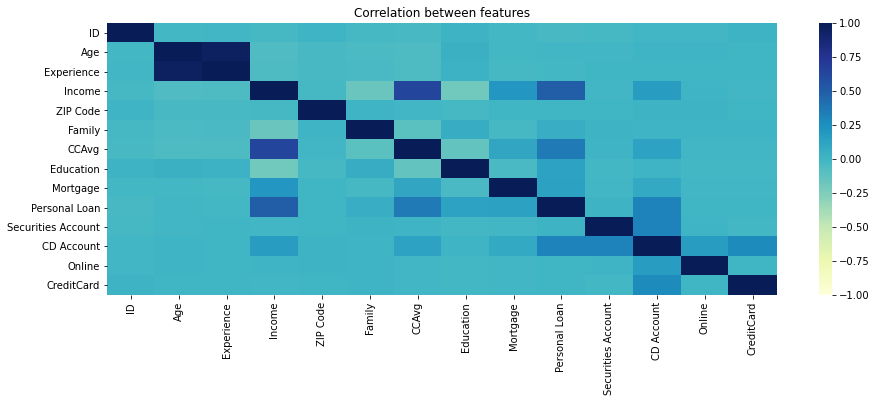

In [18]:
# To get a correlation matrix 
# Ploting correlation plot
corr = bp.corr() 
plt.figure(figsize=(15, 5))

# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart

sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0)

# specify name of the plot
plt.title('Correlation between features')
plt.show()


**As proper conclusions are not made regarding the features which geniunely affect the Personal Loan, so need to dive-in more for the same**


# 2. Distributions of attributes

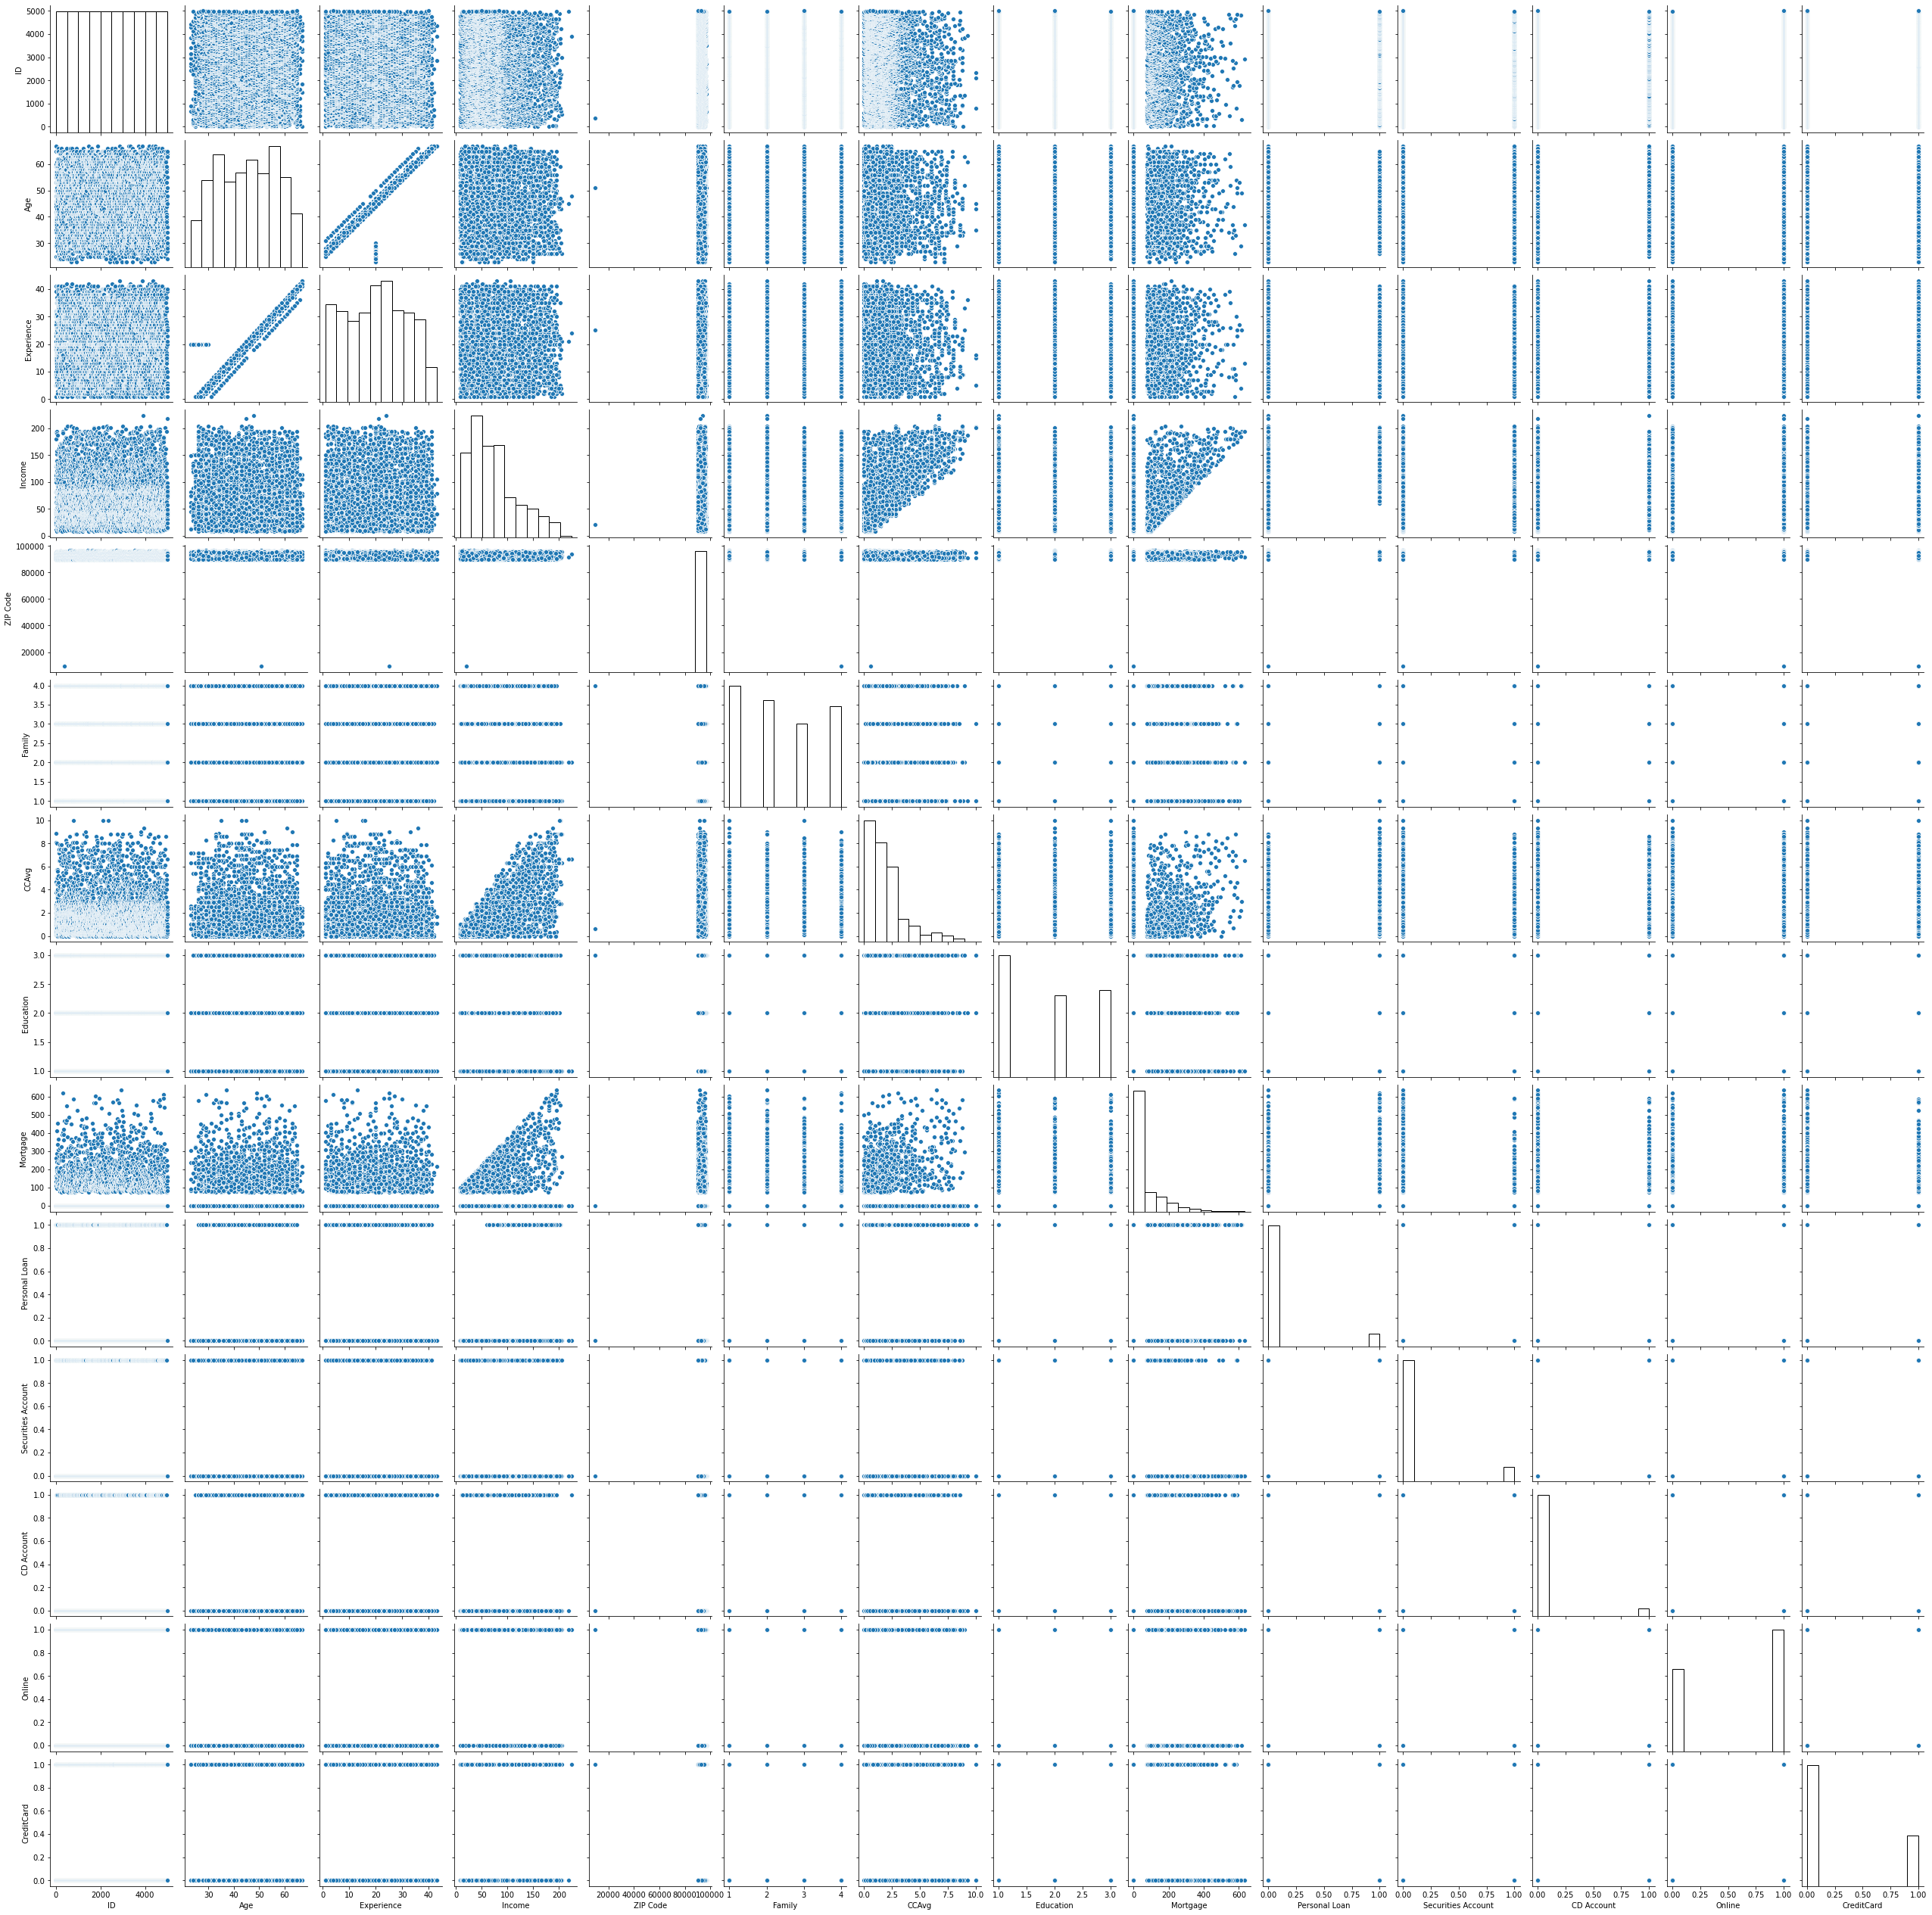

In [19]:
sns.pairplot(bp,diag_kws=dict(fill=False))

### Analysis of the continuous variables

Distribution of age column


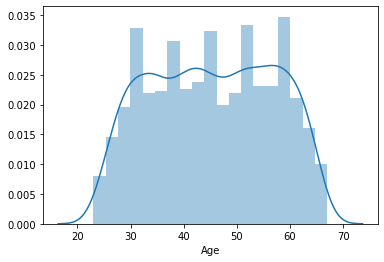

In [20]:
print('Distribution of age column')
sns.distplot(bp['Age'], kde=True)

**Age feature is normally distributed with majority of customers falling between 35 years and 55 years of age. We can infer from the graph above, and also in info attained from describe() shows mean is almost equal to median.**

Distribution of Experience column


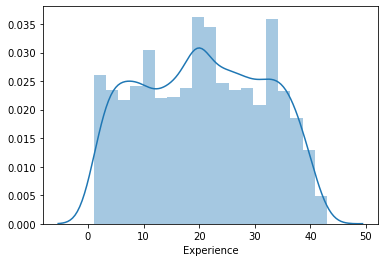

In [21]:
print('Distribution of Experience column')
sns.distplot(bp['Experience'], kde=True)

**Experience is normally distributed with more customer having experience starting from 11 years to 30 Years. Here also the mean is equal to median.**

Distribution of Income column


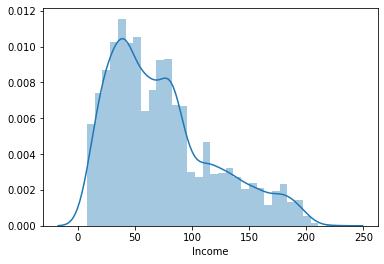

In [22]:
print('Distribution of Income column')
sns.distplot(bp['Income'], kde=True)


**Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median.**

Distribution of CCAvg column


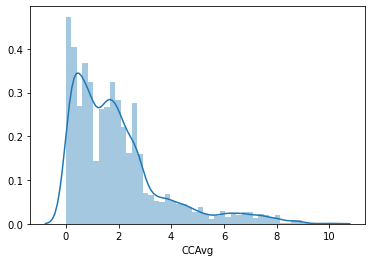

In [23]:
print('Distribution of CCAvg column')
sns.distplot(bp['CCAvg'], kde=True)

**CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K.**

Distribution of Mortgage column


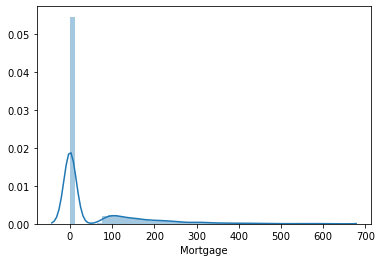

In [24]:
print('Distribution of Mortgage column')
sns.distplot(bp['Mortgage'], kde=True)

**Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K.**

## Analysis of the categorical variables

Text(0.5, 1.0, 'Credit Card Distribution')

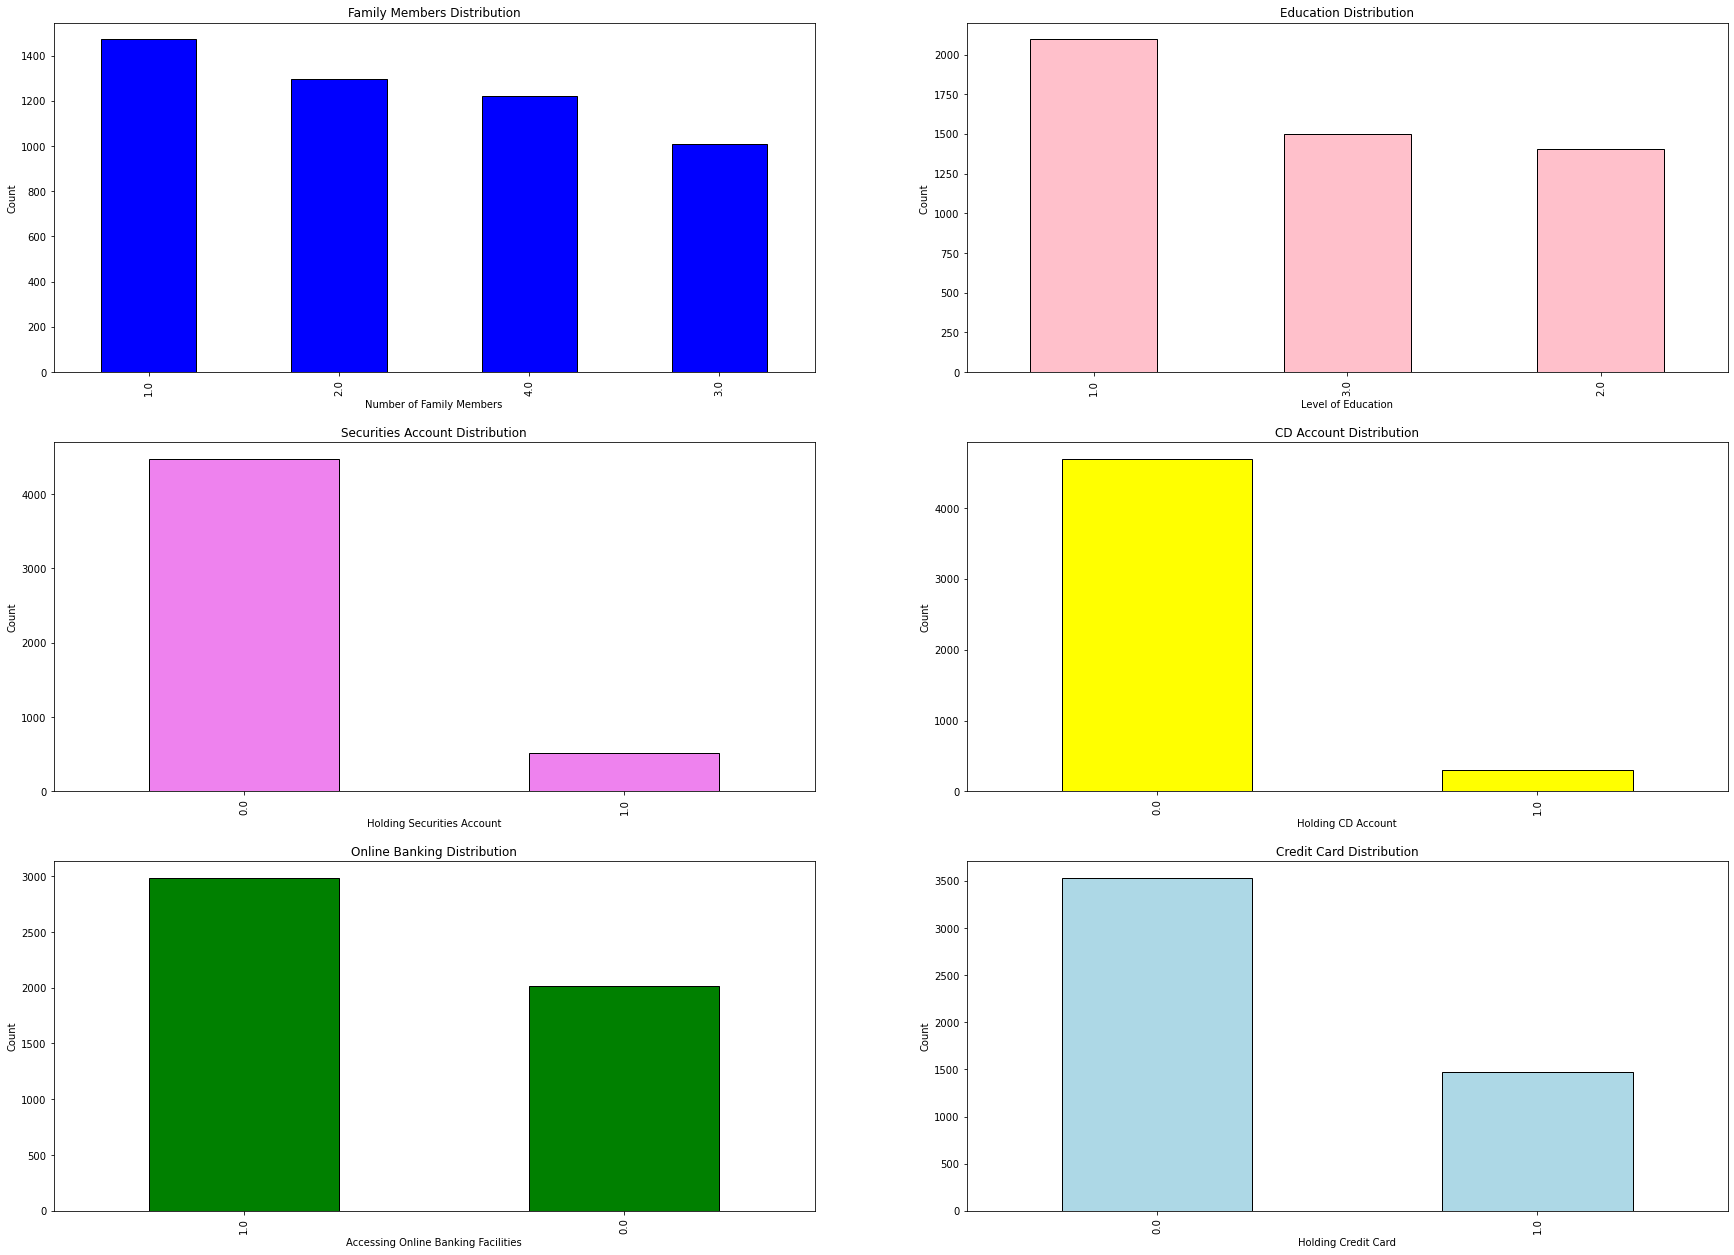

In [25]:
plt.figure(figsize=(30,45))


plt.subplot(6,2,1)
bp['Family'].value_counts().plot(kind="bar", align='center',color = 'blue',edgecolor = 'black')
plt.xlabel("Number of Family Members")
plt.ylabel("Count")
plt.title("Family Members Distribution")


plt.subplot(6,2,2)
bp['Education'].value_counts().plot(kind="bar", align='center',color = 'pink',edgecolor = 'black')
plt.xlabel('Level of Education')
plt.ylabel('Count ')
plt.title('Education Distribution')


plt.subplot(6,2,3)
bp['Securities Account'].value_counts().plot(kind="bar", align='center',color = 'violet',edgecolor = 'black')
plt.xlabel('Holding Securities Account')
plt.ylabel('Count')
plt.title('Securities Account Distribution')


plt.subplot(6,2,4)
bp['CD Account'].value_counts().plot(kind="bar", align='center',color = 'yellow',edgecolor = 'black')
plt.xlabel('Holding CD Account')
plt.ylabel('Count')
plt.title("CD Account Distribution")


plt.subplot(6,2,5)
bp['Online'].value_counts().plot(kind="bar", align='center',color = 'green',edgecolor = 'black')
plt.xlabel('Accessing Online Banking Facilities')
plt.ylabel('Count')
plt.title("Online Banking Distribution")


plt.subplot(6,2,6)
bp['CreditCard'].value_counts().plot(kind="bar", align='center',color = 'lightblue',edgecolor = 'black')
plt.xlabel('Holding Credit Card')
plt.ylabel('Count')
plt.title("Credit Card Distribution")

**Family:It has 4 peaks(4 values) , families with least member is highest in the sample.**

**Eductaion :Mean and median is almost equal. Data is finely distributed. A few peaks shows different values dominance.**

**Securities Account :This attributes tells us that majorly cutomers are not having Security account.**

**CD Account:Most of the customers dont have CDaccounts.**

**Online:Higher number of customers use online banking in the sample.**

**Credit Card: This attribute has less customers using CC in comparison to the CC users.**

**The variables family and education are ordinal variables. The distribution of families is evenly distributed**

**It seems that many of the population is not holding Securities Account and CD Account, vast difference is visible**

As there strong relation between Age and Experience of 0.96(approx),
the relation must too checked with Personal Loan


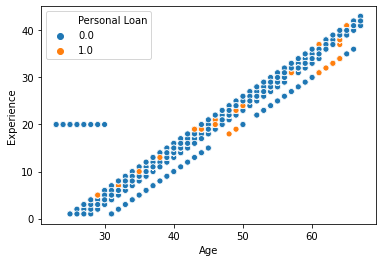

In [26]:
print('As there strong relation between Age and Experience of 0.96(approx),\nthe relation must too checked with Personal Loan')
sns.scatterplot(x="Age",y="Experience",data=bp,hue='Personal Loan')

**Loan is offered to customers having _Age_ more than 45yrs and _Experience_ more than 10yrs**

As there strong relation between Income and CCAvg of 0.65(approx),
the relation must too checked with Personal Loan


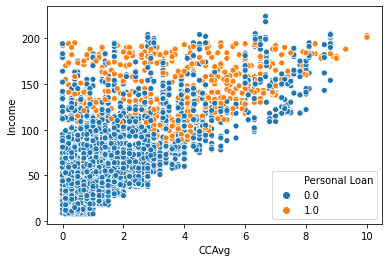

In [27]:
print('As there strong relation between Income and CCAvg of 0.65(approx),\nthe relation must too checked with Personal Loan')
sns.scatterplot(y="Income",x="CCAvg",data=bp,hue='Personal Loan')

As there is relation between Income and Mortgage of 0.20(approx),
the relation must too checked with Personal Loan


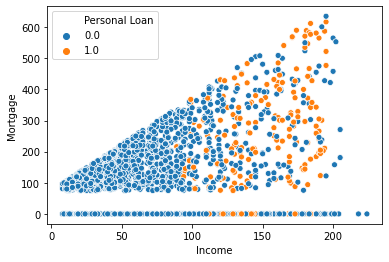

In [28]:
print('As there is relation between Income and Mortgage of 0.20(approx),\nthe relation must too checked with Personal Loan')
sns.scatterplot(x="Income",y="Mortgage",data=bp,hue='Personal Loan')

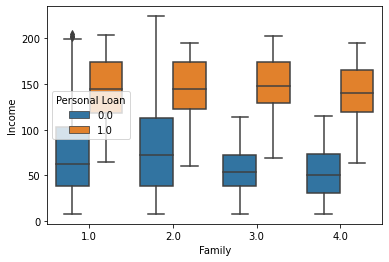

In [29]:
sns.boxplot(y="Income",x="Family",data=bp,hue='Personal Loan')

**Loan is granted only to those persons who have income more than 125$(approx), irrespective of thier number of family members**

# 3. Get the target column distribution.


Distribution of Personal Loan column


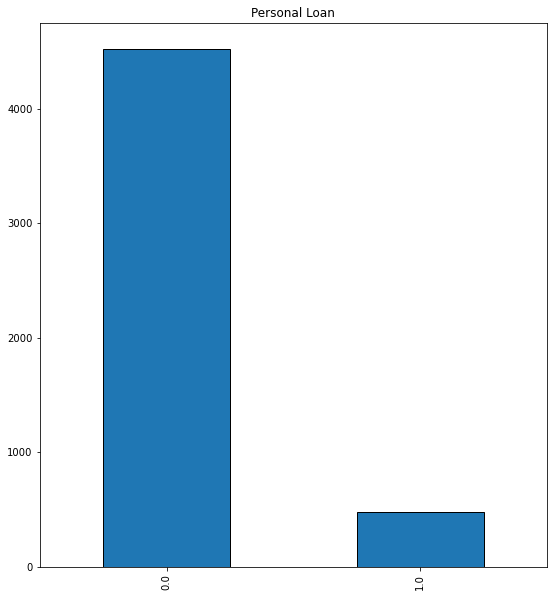

In [30]:
# Set up a grid of plots
fig = plt.figure(figsize=(20,10)) 
fig_dims = (1, 2)

print('Distribution of Personal Loan column')
plt.subplot2grid(fig_dims, (0,0))
bp['Personal Loan'].value_counts().plot(kind='bar', title='Personal Loan',edgecolor="0")

In [31]:
count_no_sub = len(bp[bp['Personal Loan']==0])
print('Total Count of Loan not offered :',count_no_sub)
count_sub = len(bp[bp['Personal Loan']==1])
print('Total Count of Loan offered:',count_sub)
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("Percentage of Loan not offered", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("Percentage of Loan offered", pct_of_sub*100)

Total Count of Loan not offered : 4520
Total Count of Loan offered: 480
Percentage of Loan not offered 90.4
Percentage of Loan offered 9.6


In [32]:
bp.groupby(bp['Personal Loan']).mean()

ID        Age  Experience      Income      ZIP Code  \
Personal Loan                                                                 
0.0            2512.165487  45.367257   20.640044   66.237389  93152.428761   
1.0            2390.650000  45.066667   20.135417  144.745833  93153.202083   

                 Family     CCAvg  Education    Mortgage  Securities Account  \
Personal Loan                                                                  
0.0            2.373451  1.729009   1.843584   51.789381            0.102212   
1.0            2.612500  3.905354   2.233333  100.845833            0.125000   

               CD Account    Online  CreditCard  
Personal Loan                                    
0.0              0.035841  0.595796    0.293584  
1.0              0.291667  0.606250    0.297917

**Observations:**

**1). The _Average Income_ of customers who were offered loan is more than double of the _Average Income_ of customers who didn’t offered loan.**


**2). The average customer spending on _Credit Cards_ per month (**$**000) is also more than double for the customer's who offered loan.**

**3). The average mortage for loan availing customers is approximately double for the not availing customers.**

**4). Avg literacy is less for non loan takers.**

# Correlation with _Personal Loan_

In [33]:
#Looking at the attributes where the variance is less than 1
#a['Personal Loan']
v = bp.corr()
v['Personal Loan']

ID                   -0.024801
Age                  -0.007726
Experience           -0.013510
Income                0.502462
ZIP Code              0.000107
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64

**ID, and Zip Code can attribute can be dropped.**

**From this table following general conclusions can be made**

**As there is strongly co-relation between _Age_ and _Experience_ .9 (approx), which means with the growth in age of the customer, experience aslo increases, so for predicition for _Personal Loan_ any of one the feature can be eliminated.**

As there is relation between Personal Loan and Family of .06(approx),
therefore feature(family) must taken in account for predicition of model


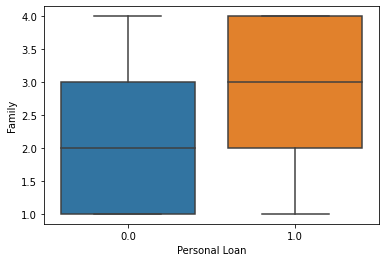

In [34]:
print('As there is relation between Personal Loan and Family of .06(approx),\ntherefore feature(family) must taken in account for predicition of model')
sns.boxplot(x='Personal Loan',y="Family",data=bp,)

**Customers with more than 2 _Family members_ ,are those who were mostly offered for _Personal Loan_**

As there is relation between Personal Loan and Education of .0.13(approx),
therefore feature(Education) must taken in account for predicition of model


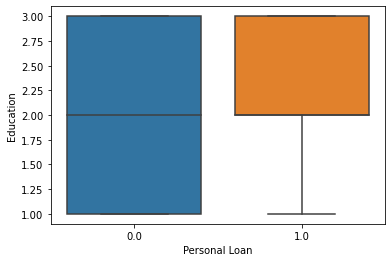

In [35]:
print('As there is relation between Personal Loan and Education of .0.13(approx),\ntherefore feature(Education) must taken in account for predicition of model')
sns.boxplot(x="Personal Loan",y='Education',data=bp)

**Loan is offered mostly to only those customers who have done their Gradution and Advance/Professional Studies**

As there is relation between Personal Loan and Mortgag of 0.14(approx),
therefore feature(Mortgag) must taken in account for predicition of model


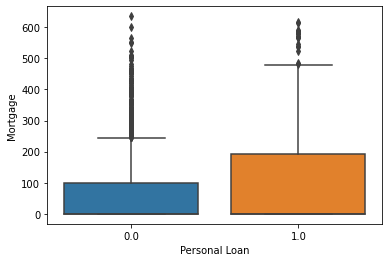

In [36]:
print('As there is relation between Personal Loan and Mortgag of 0.14(approx),\ntherefore feature(Mortgag) must taken in account for predicition of model')
sns.boxplot(x="Personal Loan",y='Mortgage',data=bp)

**There are many customer with High _Mortgage Value_ and not have offered for _Personal Loan_ but few customer with Less _Mortgage Value_ were offered for _Personal Loan_**

As there is relation between Personal Loan and CCAvg of 0.37(approx),
therefore feature(CCAvg) must taken in account for predicition of model


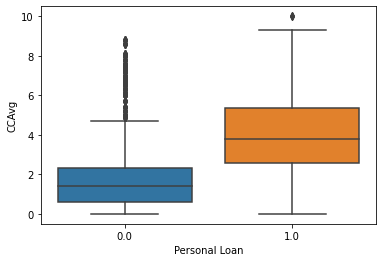

In [37]:
print('As there is relation between Personal Loan and CCAvg of 0.37(approx),\ntherefore feature(CCAvg) must taken in account for predicition of model')
sns.boxplot(x="Personal Loan",y="CCAvg",data=bp)

**There are many customer who spend on _Credit Cards_ and were not offered for _Personal Loan_ but few customer who spend on _Credit Cards_ were offerd for _Personal Loan_**

As there is relation between Personal Loan and Income of .50(approx),
therefore feature(Income) must taken in account for predicition of model


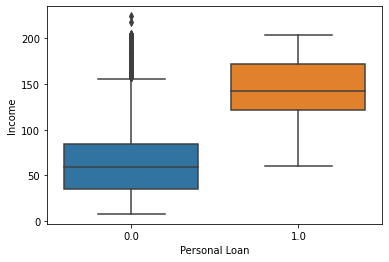

In [38]:
print('As there is relation between Personal Loan and Income of .50(approx),\ntherefore feature(Income) must taken in account for predicition of model')
sns.boxplot(x="Personal Loan",y="Income",data=bp)

**There are customers earning more than 170$ but were not offered for _Personal Loan_ but customer earning 125$(approx) - 170$(approx) were offered for _Personal Loan_**

As there is relation between Personal Loan and Securities Account of .02(approx),
therefore feature(Income) must taken in account for predicition of model


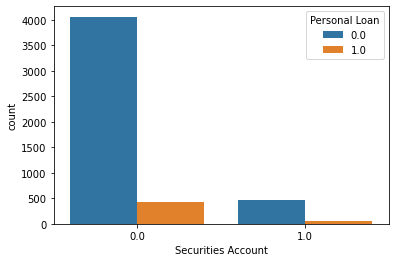

In [39]:
print('As there is relation between Personal Loan and Securities Account of .02(approx),\ntherefore feature(Income) must taken in account for predicition of model')
sns.countplot(x="Securities Account",hue="Personal Loan",data=bp)

**Many customer having _Securities Account_ were not offered for loan whereas only few customer were offered for loan having _Securities Account_**

As there is relation between Personal Loan and Online of .006(approx),
therefore feature(Income) must taken in account for predicition of model


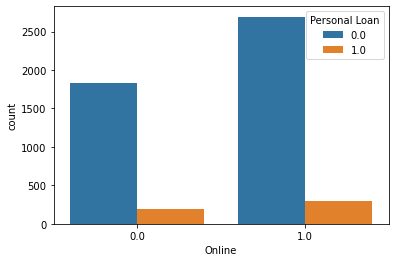

In [40]:
print('As there is relation between Personal Loan and Online of .006(approx),\ntherefore feature(Income) must taken in account for predicition of model')
sns.countplot(x="Online",hue="Personal Loan",data=bp)

# 4. Split the data into training and test set in the ratio of 70:30 respectively 

### Seperating Dependent variable and Independent Varibles from the data set
>#### Dependent Variable is **_Personal Loan_**

>#### Independent Variables which majorly effects Dependent Variables are
   1.   **Age**
   3.   **Income**
   4.   **Family**
   5.   **CCAvg**
   6.   **Education**
   7.   **Mortgage**
   8.   **Securities Acount**
   9.   **CD Account**
   10.  **CreditCards**

In [42]:
#Dependent Variable is Personal Loan
y=bp["Personal Loan"]
bpx=bp.drop(['ID','Personal Loan','Experience', 'ZIP Code'],axis=1)
x=bpx
bpx.head(5)
accuracies={}

In [43]:
#Standardizing and Normalizing data
standardized_X = preprocessing.scale(x)
normalized_X = preprocessing.normalize(x)

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

## Using different classification models to predict the likelihood of a customer buying personal loans 
   1. Logistic
   2. K-NN
   3. Naïve Bayes

## 1.Logistic Regression

#### It is very important to perform feature scaling here because eacch columns values lie in different ranges. If we don’t scale the features then High range value feature will dominate Low range value feature when the model finds the nearest neighbor to a data point in data space.

#### Training our Logistic Regression model.

In [45]:
# import logistic regression and train on tarining set
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [46]:
# Predict target column of test data
y_pred = model.predict(x_test)

In [47]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracies['LR'] = accuracy
print("Accuracy rate of",accuracy,"viz. considered as good accuracy")

Accuracy rate of 0.9393333333333334 viz. considered as good accuracy


In [48]:
print('Compute report precision    recall  F-measure  support\n',classification_report(y_test, y_pred))

Compute report precision    recall  F-measure  support
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      1351
         1.0       0.85      0.48      0.61       149

    accuracy                           0.94      1500
   macro avg       0.90      0.73      0.79      1500
weighted avg       0.94      0.94      0.93      1500



#### Precision: Precision is about being precise, i.e., how accurate your model is. In other words,when a model makes a prediction, how often it is correct.

In [49]:
print("The Precision of model that predict the likelihood of a liability that the customer will buy personal loans is :",metrics.precision_score(y_test, y_pred))

The Precision of model that predict the likelihood of a liability that the customer will buy personal loans is : 0.8452380952380952


In [50]:
metrics.confusion_matrix(y_test, y_pred)

array([[1338,   13],
       [  78,   71]], dtype=int64)

**Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions.**

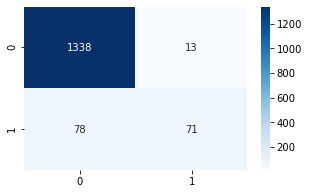

In [51]:
# Display confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (5,3))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

## 2. K-NN

In [52]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

xScaled  = x.apply(zscore)  # convert all attributes to Z scale 

In [53]:
# Creating odd list of K for KNN
myList = list(range(1,20))

# Subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

#### Choosing the K-Value
**Choosing the right k is not easy and is subjective.**

**Usually choosen as an odd number.**

**A small k captures too much training noise and hence does not do well in test data. A very large k does so much smoothening that it does not manage to capture information in the training data sufficiently - and hence does not do well in test data.**


In [54]:
# Empty list that will hold accuracy scores
ac_scores = []

# Perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    # Predict the response
    y_Pred = knn.predict(x_test)
    
    # Evaluate accuracy
    scores = accuracy_score(y_test, y_Pred)
    ac_scores.append(scores)

# Changing to misclassification error
MSE = [1 - x for x in ac_scores]

# Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 3


In [55]:
# Build kNN Model
NNH = KNeighborsClassifier(n_neighbors= optimal_k , weights = 'distance' )
# Call Nearest Neighbour algorithm
NNH.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [56]:
# Predict target column of test data
predicted_labels = NNH.predict(x_test)
y_pred = NNH.predict(x_test)

In [57]:
accuracy = metrics.accuracy_score(y_test,predicted_labels)
accuracies['KNN'] = accuracy
print("Accuracy rate of",accuracy,"viz. considered as good accuracy")

Accuracy rate of 0.9113333333333333 viz. considered as good accuracy


In [58]:
print("The Precision of model that predict the likelihood of a liability that the customer will buy personal loans is :",metrics.precision_score(y_test, y_pred))

The Precision of model that predict the likelihood of a liability that the customer will buy personal loans is : 0.5784313725490197


In [59]:
print('Compute report precision    recall  F-measure  support\n',classification_report(y_test, y_pred))

Compute report precision    recall  F-measure  support
               precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      1351
         1.0       0.58      0.40      0.47       149

    accuracy                           0.91      1500
   macro avg       0.76      0.68      0.71      1500
weighted avg       0.90      0.91      0.90      1500



In [60]:
confusion_matrix(y_test, y_pred)

array([[1308,   43],
       [  90,   59]], dtype=int64)

**Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions.**

Confusion Matrix


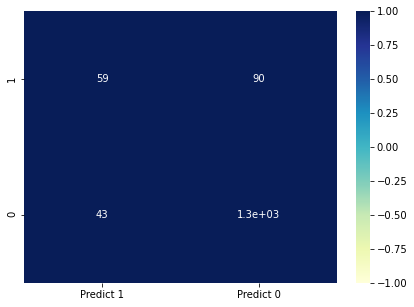

In [61]:
# calculate accuracy measures and confusion matrix

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in [1,0]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,cmap='YlGnBu', vmax=1.0, vmin=-1.0)

In [62]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(x_train, y_train)
    scores.append(NNH.score(x_test, y_test))

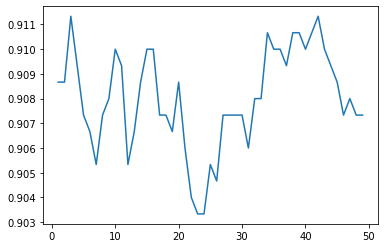

In [63]:
plt.plot(range(1,50),scores)

#### Comparing Error Rate with the K Value
we will plot the mean error for the predicted values of test set for all the K values between 1 and 40.

In [64]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

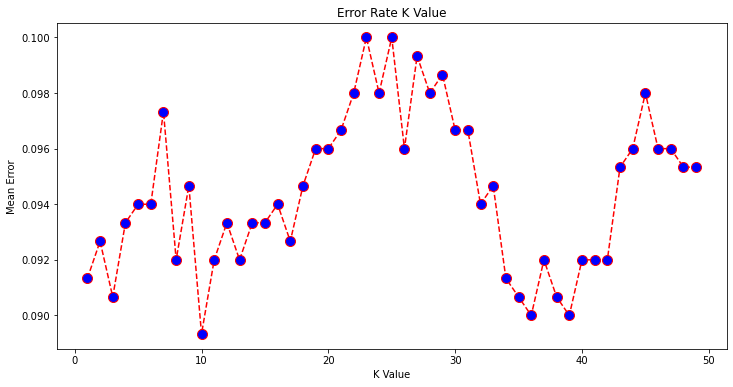

In [65]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## 3. Naïve Bayes

In [66]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(x_train, y_train)

GaussianNB()

In [67]:
#Predict the response for test dataset
y_pred = gnb.predict(x_test)

In [68]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracies['NB'] = accuracy
print("Accuracy:",accuracy)

Accuracy: 0.8746666666666667


In [69]:
print('Compute report precision    recall  F-measure  support\n',classification_report(y_test, y_pred))

Compute report precision    recall  F-measure  support
               precision    recall  f1-score   support

         0.0       0.95      0.91      0.93      1351
         1.0       0.41      0.57      0.47       149

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500



**Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions.**

In [70]:
print("The Precision of model that predict the likelihood of a liability that the customer will buy personal loans is :",metrics.precision_score(y_test, y_pred))

The Precision of model that predict the likelihood of a liability that the customer will buy personal loans is : 0.40669856459330145


In [71]:
confusion_matrix(y_test, y_pred)

array([[1227,  124],
       [  64,   85]], dtype=int64)

**Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions.**

Text(83.40000000000006, 0.5, 'predicted label')

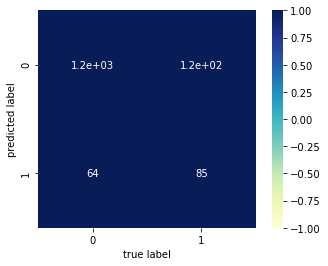

In [72]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True, annot=True,cmap='YlGnBu', vmax=1.0, vmin=-1.0)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Evaluating the best classifiaction for model

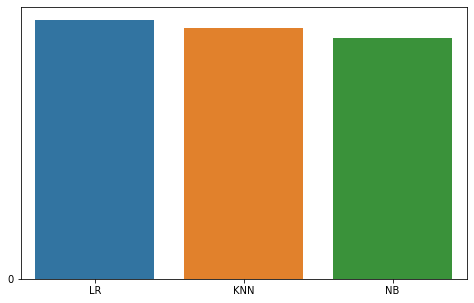

In [73]:
plt.figure(figsize = (8,5))
plt.yticks(np.arange(0,100,10))
sns.barplot(x = list(accuracies.keys()), y = list(accuracies.values()))

In [74]:
y_cm_lr = model.predict(x_test)
y_cm_nb = gnb.predict(x_test)
y_cm_knn = knn.predict(x_test)


In [75]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_cm_lr)
cm_knn = confusion_matrix(y_test, y_cm_knn)
cm_nb = confusion_matrix(y_test, y_cm_nb)

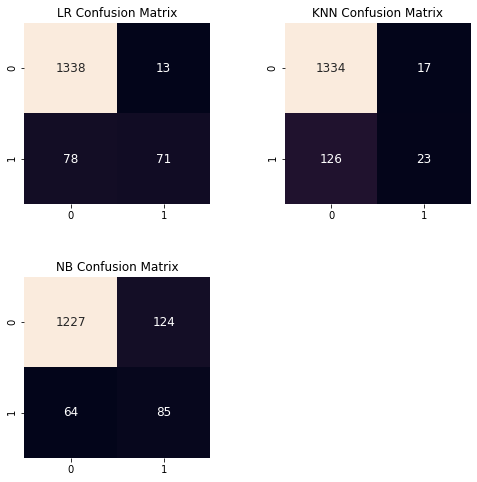

In [76]:
plt.figure(figsize = (8,8))
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

plt.subplot(2,2,1)
plt.title("LR Confusion Matrix")
sns.heatmap(cm_lr,annot=True,fmt="d",cbar=False, annot_kws={"size": 12})

plt.subplot(2,2,2)
plt.title("KNN Confusion Matrix")
sns.heatmap(cm_knn, annot = True, fmt = 'd', cbar = False, annot_kws = {"size": 12})

plt.subplot(2,2,3)
plt.title("NB Confusion Matrix")
sns.heatmap(cm_nb, annot = True, fmt = 'd', cbar = False, annot_kws = {"size": 12})

In [77]:
accuracies

{'LR': 0.9393333333333334, 'KNN': 0.9113333333333333, 'NB': 0.8746666666666667}

**The _Logistic Regression_ model has the best accuracy of the train and test set is almost similar and also the precsion and recall accuracy is good. The _Logistic Regression_ confusion matrix is also better in comparision to other models.**

**The _KNN_ model has less accuracy of the train and test set as it is distance based which not perfect for this situation. As the requirement is to classify the target. Confusion matrix tells that is correct predictions is not that much acceptable.**

**The _Naive Bayes_ giving the ccuracy less in comaprision to other models meaning the probability of determing the target correctly is less.**


# Logistic Regression model is the best model with the analysis done.